# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fadhilah Nurrahmayanti
- **Email:** a117xbm150@devacademy.id
- **ID Dicoding:** dilaafn

## Menentukan Pertanyaan Bisnis

- Apakah ada pola lonjakan peminjaman sepeda pada tanggal tertentu dalam sebulan?
- Bagaimana perbedaan perilaku peminjaman sepeda antara pengguna casual dan registered dalam 24 jam?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

#### Menampilkan tabel day_df

In [3]:
day_df =pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Informasi mengenai struktur data dalam file day.csv, termasuk kolom-kolom yang tersedia serta lima baris pertama dari dataset.
- Dataset ini mencatat data penyewaan sepeda, mencakup berbagai informasi seperti tanggal (dteday), musim (season), status hari kerja atau hari libur (workingday, holiday), serta faktor cuaca seperti suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed).
- Mencantumkan jumlah penyewaan sepeda berdasarkan kategori pengguna casual, registered, serta total keseluruhannya yang tercatat dalam kolom cnt.

#### Menampilkan tabel hour_df

In [4]:
hour_df =pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Struktur data dalam file hour.csv, termasuk kolom-kolom yang tersedia serta lima baris pertama dari dataset.
- Memiliki granularitas yang lebih tinggi dari day.csv karena mencatat data penyewaan sepeda berdasarkan jam (hr).
- Memuat informasi terkait tanggal (dteday), musim (season), tahun (yr), status hari kerja atau libur (workingday, holiday), kondisi cuaca (weathersit, temp, hum, windspeed), serta jumlah penyewaan sepeda berdasarkan kategori pengguna casual, registered, dan total keseluruhannya dalam kolom cnt.

### Assessing Data

Menilai tabel day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**

- Seharusnya, kolom dteday direpresentasikan sebagai datetime, bukan object, yang umumnya digunakan untuk tipe data string.

Memeriksa missing value pada tabel day_df

In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**

- Tidak terdapat nilai missing value.

 Memeriksa duplikasi pada tabel day_df

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**

- Tidak terdapat duplikasi data pada day_df.

Menilai tabel hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

- Seharusnya, kolom dteday direpresentasikan sebagai datetime, bukan object, yang umumnya digunakan untuk tipe data string.

Memeriksa missing value pada tabel hour_df

In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**

- Tidak terdapat nilai missing value.

 Memeriksa duplikasi pada tabel hour_df

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**

- Tidak terdapat duplikasi data pada day_df.

### Cleaning Data

##### Memperbaiki tipe data day_df

In [11]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**

- Tipe data kolom 'dteday' berhasil diubah dari object menjadi datetime.

##### Memperbaiki tipe data hour_df

In [12]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

- Tipe data kolom 'dteday' berhasil diubah dari object menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [13]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**

- Jumlah peminjaman sepeda harian berkisar antara 22 sepeda (terendah) hingga 8.714 sepeda (tertinggi).
- Penyewa casual memiliki jumlah peminjaman terendah 2 sepeda per hari, sedangkan jumlah tertingginya mencapai 3.410 sepeda.
- Penyewa registered meminjam sepeda paling sedikit 20 sepeda per hari, dengan jumlah tertinggi mencapai 6.946 sepeda dalam satu hari.

#### Total Peminjaman Sepeda Per Tahun

In [14]:
tot_casual_day = day_df['casual'].sum()
tot_registered_day = day_df['registered'].sum()

day_df['yr'] = day_df['dteday'].dt.year

yr_rent = day_df.groupby('yr')['cnt'].sum().reset_index()

In [15]:
print("Total Peminjaman Sepeda Per Tahun: ")
day_df.groupby(by="yr").agg({"casual": "sum", "registered": "sum", "cnt": "sum"})

Total Peminjaman Sepeda Per Tahun: 


,casual,registered,cnt
yr,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


**Insight:**

- Total peminjaman sepeda casual (tidak terdaftar) selama tahun 2011-2012 mencapai 620.017 sepeda.
- Total peminjaman sepeda registered (terdaftar) selama periode yang sama adalah 2.672.662 sepeda.
- Secara keseluruhan, total peminjaman sepeda dalam dua tahun tersebut mencapai 3.292.679 sepeda.
- Peminjaman oleh pengguna dengan status registered jauh lebih dominan dibandingkan casual.
- Terdapat peningkatan jumlah peminjaman sepeda dari tahun 2011 ke 2012, menunjukkan tren pertumbuhan yang konsisten dalam penggunaan layanan.








#### Total Peminjaman Sepeda Per Bulan

In [16]:
mnth_rent = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

In [17]:
print("Total Peminjaman Sepeda Per Bulan: ")
mnth_rent

Total Peminjaman Sepeda Per Bulan: 


,yr,mnth,cnt
0,2011,1,38189
1,2011,2,48215
2,2011,3,64045
3,2011,4,94870
4,2011,5,135821
5,2011,6,143512
6,2011,7,141341
7,2011,8,136691
8,2011,9,127418
9,2011,10,123511


**Insight:**

- Data menunjukkan total peminjaman sepeda per bulan selama tahun 2011 dan 2012.
- Terdapat tren peningkatan jumlah peminjaman sepeda dari awal tahun hingga pertengahan tahun.
- Peminjaman sepeda mencapai puncaknya pada bulan Mei - September sebelum mengalami penurunan.
- Penurunan jumlah peminjaman terjadi di bulan-bulan terakhir tiap tahun, kemungkinan disebabkan oleh faktor musim atau kondisi cuaca.


#### Total peminjaman sepeda Per Hari

In [18]:
day = {0: 'Sun', 1: 'Mon', 2: 'Tues', 3: 'Wednes',
                4: 'Thurs', 5: 'Fri', 6: 'Satur'}

day_df['day'] = day_df['weekday'].map(day)

In [19]:
result = day_df.groupby(by="day").agg({"cnt": ["max", "min", "mean", "std"]})

In [20]:
result_sorted = result.sort_values(("cnt", "mean"), ascending=False)
result_sorted

cnt                                
         max   min         mean          std
day                                         
Fri     8362  1167  4690.288462  1874.624870
Thurs   7804   431  4667.259615  1939.433317
Satur   8714   627  4550.542857  2196.693009
Wednes  8173   441  4548.538462  2038.095884
Tues    7767   683  4510.663462  1826.911642
Mon     7525    22  4338.123810  1793.074013
Sun     8227   605  4228.828571  1872.496629

**Insight:**

- Statistik menunjukkan pola peminjaman sepeda yang berbeda berdasarkan hari dalam seminggu.
- Peminjaman lebih tinggi pada hari kerja, terutama pada hari Kamis dan Jumat. Hal ini menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi untuk keperluan kerja atau aktivitas rutin.
- Pada hari libur, peminjaman sepeda tetap tinggi, tetapi variasinya lebih besar dibandingkan dengan hari kerja yang kemungkinan penggunaan sepeda untuk rekreasi, olahraga ataupun aktivitas santai.

#### Total Peminjaman Sepeda Berdasarkan Musim

In [45]:
season = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["season_desc"] = day_df["season"].map(season)

season_avg = day_df.groupby("season_desc")["cnt"].mean().reset_index()

season_avg.sort_values(by="cnt", ascending=False)

,season_desc,cnt
0,Fall,5644.303191
2,Summer,4992.331522
3,Winter,4728.162921
1,Spring,2604.132597


**Insight:**

- Fall (5644.30) → Musim dengan peminjaman tertinggi, kemungkinan karena suhu yang nyaman untuk bersepeda.
- Summer (4992.33) → Peminjaman tinggi, didorong oleh cuaca yang lebih kering dan aktivitas luar ruangan meningkat.
- Winter (4728.16) → Sedikit menurun, kemungkinan karena suhu dingin atau kondisi jalanan yang kurang mendukung.
- Spring (2604.13) → Peminjaman terendah, mungkin akibat transisi dari musim dingin yang membuat pengguna kurang aktif.

#### Total Peminjaman Sepeda Tertinggi

In [21]:
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
month_rent = day_df.groupby(['year', 'month'])['cnt'].sum().reset_index()

month_rent['month'] = month_rent['month'].apply(lambda x: calendar.month_name[x])
month_rent['month'] = pd.Categorical(month_rent['month'], categories=list(calendar.month_name[1:]), ordered=True)

year_2011= month_rent[month_rent['year'] == 2011]
highest_2011 = year_2011.loc[year_2011['cnt'].idxmax()]
highest_bymonth_2011 = highest_2011['month']
max_2011 = highest_2011['cnt']

year_2012= month_rent[month_rent['year'] == 2012]
highest_2012 = year_2012.loc[year_2012['cnt'].idxmax()]
highest_bymonth_2012 = highest_2012['month']
max_2012 = highest_2012['cnt']

In [22]:
print(f"Bulan dengan jumlah peminjaman tertinggi di 2011: Bulan {highest_bymonth_2011}, dengan {max_2011} unit sepeda.")
print(f"Bulan dengan jumlah peminjaman tertinggi di 2012: Bulan {highest_bymonth_2012}, dengan {max_2012} unit sepeda.")

Bulan dengan jumlah peminjaman tertinggi di 2011: Bulan June, dengan 143512 unit sepeda.
Bulan dengan jumlah peminjaman tertinggi di 2012: Bulan September, dengan 218573 unit sepeda.


**Insight:**

- Bulan dengan Peminjaman Tertinggi
  - Tahun 2011 → Bulan Juni (143.512 peminjaman)
  - Tahun 2012 → Bulan September (218.573 peminjaman)

- Pola ini menunjukkan bahwa puncak peminjaman tidak selalu terjadi di bulan yang sama setiap tahun, melainkan dapat bergeser tergantung pada berbagai faktor seperti cuaca, musim liburan, atau event tertentu.

### Explore hour_df

In [23]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**

- Jumlah peminjaman sepeda per jam berkisar antara 1 sepeda (terendah) hingga 977 sepeda (tertinggi).
- Peminjam casual memiliki jumlah peminjaman terendah 0 sepeda per jam, sedangkan jumlah tertingginya mencapai 367 sepeda dalam satu jam.
- Peminjam registered meminjam sepeda paling sedikit 0 sepeda per jam, dengan jumlah tertinggi mencapai 886 sepeda dalam satu jam.

#### Total Peminjaman Sepeda Per Jam

Mengategorikan jam ke dalam periode waktu tertentu

In [24]:
def cat_hour(hr):
    if 0 <= hr < 6:
        return 'Midnight - Early Morning'
    elif 6 <= hr < 12:
        return 'Morning'
    elif 12 <= hr < 18:
        return 'Afternoon'
    else:
        return 'Evening - Night'

hour_df['hr_cat'] = hour_df['hr'].apply(cat_hour)

Mengelompokkan berdasarkan kategori jam dan menghitung statistik peminjaman

In [25]:
hr_stats = hour_df.groupby('hr_cat')['cnt'].agg(['mean', 'max', 'min', 'std'])

In [26]:
result = hr_stats.sort_values(by='mean', ascending=False)
result

,mean,max,min,std
hr_cat,,,,
Afternoon,295.483886,976,3,181.656294
Evening - Night,225.757555,977,2,175.218285
Morning,208.100688,839,1,163.972903
Midnight - Early Morning,24.908559,283,1,30.274492


**Insight:**

- Siang hari (Afternoon) memiliki jumlah peminjaman tertinggi (rata-rata 295.48), kemungkinan karena banyak orang menggunakan sepeda untuk perjalanan kerja, makan siang, atau aktivitas lainnya.
- Malam hari (Evening - Night) berada di posisi kedua (225.76), menunjukkan bahwa banyak pengguna masih memanfaatkan sepeda untuk perjalanan pulang kerja atau aktivitas rekreasi.
- Pagi hari (Morning) memiliki rata-rata peminjaman sebesar 208.10, yang kemungkinan besar mencerminkan pengguna yang berangkat ke kantor atau sekolah.
- Dini hari (Midnight - Early Morning) memiliki peminjaman terendah (24.91), yang wajar karena kebanyakan orang beristirahat pada jam tersebut.

#### Total Peminjaman Per Jam Sepeda pada Pengguna Casual

Hitung statistik jumlah peminjaman sepeda berdasarkan kombinasi kategori

In [27]:
casual_hr = hour_df.groupby(by="casual").agg({"cnt": ["max", "min", "mean", "std"]})


Urutkan berdasarkan rata-rata jumlah peminjaman sepeda

In [28]:
result = casual_hr.sort_values(("cnt", "mean"), ascending=False)
result

cnt                             
        max  min        mean         std
casual                                  
350     783  783  783.000000         NaN
302     750  750  750.000000         NaN
362     743  743  743.000000         NaN
264     957  573  732.666667  200.000833
347     731  731  731.000000         NaN
...     ...  ...         ...         ...
4       520    4   66.513369   67.900901
3       513    3   55.460545   59.317299
2       365    2   37.298246   44.087756
1       448    1   25.121072   35.064407
0       300    1   13.232132   19.794511

[322 rows x 4 columns]

**Insight:**

- Puncak Peminjaman pada Jam Tertentu
  - Pengguna casual mencatat peminjaman tertinggi mencapai 957 unit, menandakan adanya jam-jam tertentu di mana pemakaian meningkat drastis.
  - Rata-rata peminjaman sekitar 732,67 unit, tetapi dengan standar deviasi sebesar 200, menunjukkan adanya fluktuasi yang lebih besar dibandingkan pengguna registered.

- Pola Peminjaman yang Tidak Stabil
  - Peminjaman oleh pengguna casual memiliki variabilitas yang tinggi (ditunjukkan oleh standar deviasi besar).
  - Pada beberapa jam, jumlah peminjaman turun drastis hingga hanya 1 hingga 4 unit, menunjukkan bahwa pengguna casual lebih dipengaruhi oleh kondisi tertentu seperti cuaca, hari libur, atau event spesifik.

- Lonjakan pada Jam Tertentu
  - Pengguna casual kemungkinan besar menggunakan sepeda untuk rekreasi atau aktivitas santai, sehingga peminjaman meningkat saat jam kerja berakhir atau saat akhir pekan.
  - Fluktuasi besar dalam jumlah peminjaman juga menunjukkan bahwa faktor eksternal seperti kondisi cuaca dan libur nasional sangat mempengaruhi pola peminjaman.

- Distribusi Peminjaman di Jam Sepi
  - Peminjaman terendah terjadi pada jam dini hari (00:00 - 05:00), dengan rata-rata di bawah 25 unit per jam, menunjukkan bahwa sepeda kurang digunakan oleh pengguna casual di waktu tersebut.

#### Total Peminjaman Per Jam pada Pengguna Registered

Hitung statistik jumlah peminjaman sepeda berdasarkan kombinasi kategori

In [29]:
reg_hr = hour_df.groupby(by="registered").agg({"cnt": ["max", "min", "mean", "std"]})

Urutkan berdasarkan rata-rata jumlah peminjaman sepeda

In [30]:
result = reg_hr.sort_values(("cnt", "mean"), ascending=False)
result

cnt                           
            max  min        mean       std
registered                                
886         977  977  977.000000       NaN
885         976  976  976.000000       NaN
802         970  970  970.000000       NaN
860         967  967  967.000000       NaN
876         963  953  958.000000  7.071068
...         ...  ...         ...       ...
4            21    4    5.218241  1.861528
3            14    3    3.925170  1.576658
2            16    2    2.644898  1.405647
1             7    1    1.462687  0.899917
0             4    1    1.458333  0.832971

[776 rows x 4 columns]

**Insight:**

- Puncak Peminjaman pada Jam Tertentu
  - Peminjaman tertinggi oleh pengguna registered mencapai 977 unit, menunjukkan bahwa ada jam-jam tertentu di mana permintaan sepeda sangat tinggi.
  - Rata-rata peminjaman berada di angka 958 unit, dengan standar deviasi sekitar 7.07, yang menunjukkan fluktuasi yang relatif kecil di sekitar rata-rata.

- Variasi Peminjaman Sepanjang Hari
  - Terdapat beberapa jam dengan jumlah peminjaman yang sangat rendah, bahkan serendah 1 hingga 4 unit pada jam-jam tertentu.
  - Peminjaman terendah terjadi pada dini hari (pukul 00:00 - 05:00), dengan jumlah peminjaman rata-rata di bawah 5 unit.

- Distribusi Peminjaman yang Stabil di Jam Sibuk
  - Dari data yang ada, terlihat bahwa jam sibuk (morning rush & evening rush) memiliki jumlah peminjaman yang tinggi dan relatif stabil.
  - Standar deviasi yang rendah pada jam-jam tersebut menunjukkan bahwa tren peminjaman cukup konsisten dari hari ke hari.
  
- Pengaruh Jadwal Harian terhadap Peminjaman
  - Jam-jam kerja dan pulang kerja adalah periode dengan peminjaman tertinggi.
  - Pada jam di luar peak hours (seperti tengah malam hingga subuh), permintaan menurun drastis.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada pola lonjakan peminjaman sepeda pada tanggal tertentu dalam sebulan?

In [31]:
# Menambahkan kolom 'day' dari tanggal
day_df['day'] = day_df['dteday'].dt.day

# Mengelompokkan data berdasarkan tanggal dalam sebulan
daily_rentals = day_df.groupby('day')['cnt'].agg(['max', 'min', 'mean']).reset_index()

# Menampilkan hasil
print(daily_rentals.to_string(index=False))

 day  max  min        mean
   1 7580  985 4320.500000
   2 8120  801 4390.875000
   3 7641 1349 4648.375000
   4 7403 1562 4680.625000
   5 8156 1005 4546.458333
   6 7965  605 4525.000000
   7 7504  705 4395.250000
   8 7736  959 4282.083333
   9 8227  822 4501.708333
  10 7691  623 4651.875000
  11 7767 1263 4631.083333
  12 7870 1162 4552.375000
  13 7804 1406 4643.666667
  14 8009 1421 4683.583333
  15 8714 1248 4819.875000
  16 7702  795 4576.541667
  17 7836 1000 4927.291667
  18 7865  683 4518.208333
  19 8294 1635 4599.458333
  20 8090 1812 4779.041667
  21 8167 1107 4363.125000
  22 8395  981 4119.291667
  23 8362  986 4435.166667
  24 7693  920 4316.916667
  25 8173  754 4366.708333
  26 7733  441 4431.666667
  27 7852  431 4281.083333
  28 7415 1167 4409.666667
  29 8555   22 4159.521739
  30 7713 1096 4538.409091
  31 7350 1501 4544.642857


<ipython-input-32-5b07ba192b72>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_rentals, x='day', y=metric, ax=ax[i], palette=colors)
<ipython-input-32-5b07ba192b72>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_rentals, x='day', y=metric, ax=ax[i], palette=colors)
<ipython-input-32-5b07ba192b72>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_rentals, x='day', y=metric, ax=ax[i], palette=colors)


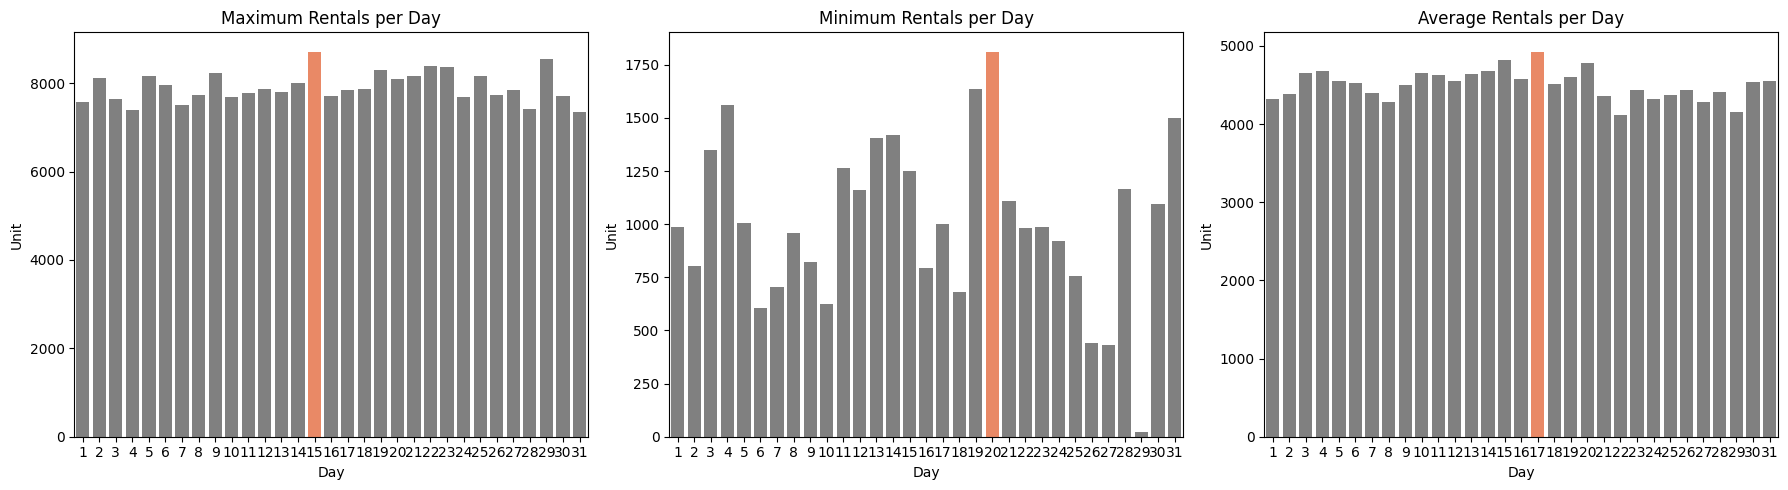

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['max', 'min', 'mean']
titles = ['Maximum Rentals per Day', 'Minimum Rentals per Day', 'Average Rentals per Day']

for i, metric in enumerate(metrics):
    # Menentukan tanggal dengan nilai tertinggi
    max_day = daily_rentals.loc[daily_rentals[metric].idxmax(), 'day']

    # Menentukan warna: biru untuk nilai tertinggi, lainnya abu-abu
    colors = ['gray' if day != max_day else 'coral' for day in daily_rentals['day']]

    sns.barplot(data=daily_rentals, x='day', y=metric, ax=ax[i], palette=colors)
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('Unit')
    ax[i].set_xlabel('Day')

plt.tight_layout()
plt.show()

**Insight:**

- Tanggal dengan Peminjaman Sepeda Tertinggi
  - Tanggal 15 mencatat peminjaman tertinggi (rata-rata 4.819,88 dan puncaknya 8.714 unit). Ini bisa dikaitkan dengan pertengahan bulan, di mana orang masih aktif beraktivitas sebelum mendekati akhir bulan. Kemungkinan ada hubungan dengan jadwal gajian atau aktivitas sosial di akhir pekan.
  - Tanggal 20 juga menunjukkan rata-rata peminjaman yang tinggi (4.779,04), yang bisa menunjukkan pola peminjaman meningkat menjelang akhir bulan. Banyak pengguna mungkin mulai lebih sering bersepeda untuk keperluan transportasi atau aktivitas rekreasi.

- Pola Peminjaman Berdasarkan Awal, Tengah, dan Akhir Bulan
  - Awal bulan (1-10), stabil dengan rata-rata 4.300 - 4.600 unit per hari. Tanggal 2, 3, dan 5 memiliki tren yang lebih tinggi dibandingkan tanggal lainnya di awal bulan.
  - Pertengahan bulan (11-20), memiliki lonjakan peminjaman tertinggi, dengan tanggal 15 dan 20 sebagai puncaknya. Tanggal 17 juga menunjukkan peningkatan peminjaman (4.927). Ini bisa mencerminkan periode aktivitas kerja dan sosial yang lebih tinggi dibandingkan waktu lainnya dalam bulan tersebut.
  - Akhir bulan (21-31), tren peminjaman sedikit menurun dibanding pertengahan bulan. Namun, masih ada lonjakan pada tanggal 22 dan 29, dengan tanggal 29 mencapai 8.555 peminjaman pada puncaknya.

### Pertanyaan 2: Bagaimana perbedaan perilaku peminjaman sepeda antara pengguna casual dan registered dalam 24 jam?

In [33]:
# Mengelompokkan data berdasarkan jam untuk casual dan registered users
hourly_rentals = hour_df.groupby('hr')[['casual', 'registered']].agg(['mean', 'max', 'min']).reset_index()

# Rename kolom agar lebih mudah dibaca
hourly_rentals.columns = ['Hour', 'Casual_Mean', 'Casual_Max', 'Casual_Min',
                          'Registered_Mean', 'Registered_Max', 'Registered_Min']

# Menampilkan data ringkasan
print(hourly_rentals.to_string(index=False))

 Hour  Casual_Mean  Casual_Max  Casual_Min  Registered_Mean  Registered_Max  Registered_Min
    0    10.158402          68           0        43.739669             234               0
    1     6.504144          49           0        26.871547             139               0
    2     4.772028          44           0        18.097902             104               0
    3     2.715925          26           0         9.011478              61               0
    4     1.253945          13           0         5.098996              22               0
    5     1.411437          16           0        18.478382              64               0
    6     4.161379          19           0        71.882759             203               0
    7    11.055021          40           0       201.009629             572               1
    8    21.679505          69           0       337.331499             808               4
    9    30.891334         142           0       188.418157             399     

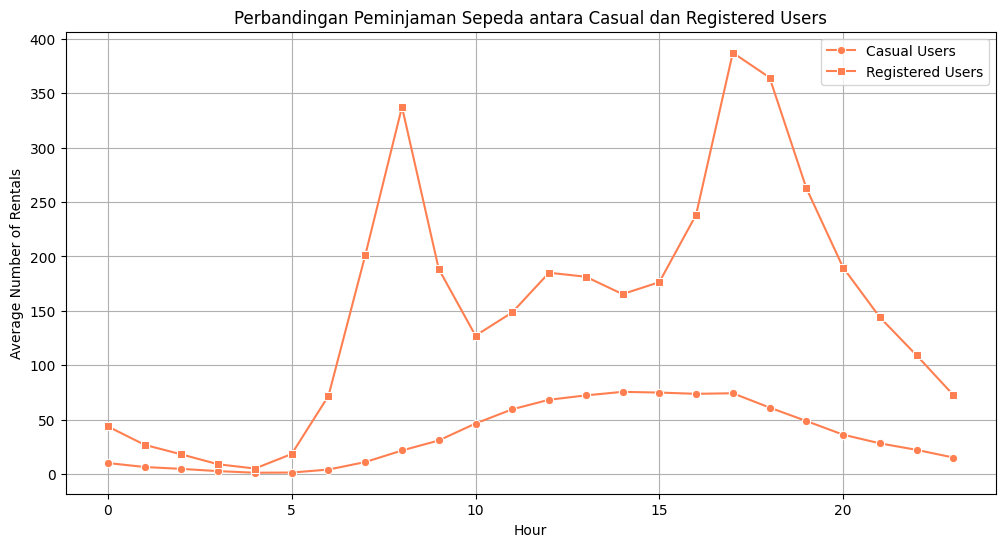

In [34]:
plt.figure(figsize=(12, 6))

# Plot pengguna casual
sns.lineplot(x=hourly_rentals['Hour'], y=hourly_rentals['Casual_Mean'], label='Casual Users', marker='o', color='coral')

# Plot pengguna registered
sns.lineplot(x=hourly_rentals['Hour'], y=hourly_rentals['Registered_Mean'], label='Registered Users', marker='s', color='coral')

# Tambahkan detail grafik
plt.xlabel('Hour')
plt.ylabel('Average Number of Rentals')
plt.title('Perbandingan Peminjaman Sepeda antara Casual dan Registered Users')
plt.legend()
plt.grid()
plt.show()

**Insight:**

- Pola Peminjaman Berbeda Antara Casual dan Registered Users
  - Pengguna registered memiliki lonjakan peminjaman yang signifikan pada jam 07:00 - 09:00 dan 17:00 - 19:00. Ini menunjukkan bahwa mereka lebih banyak menggunakan sepeda untuk keperluan transportasi harian, seperti pergi dan pulang kerja.
  - Pengguna casual menunjukkan pola peminjaman yang lebih stabil sepanjang hari, dengan sedikit peningkatan menjelang siang dan sore hari. Hal ini menunjukkan bahwa mereka lebih sering menggunakan sepeda untuk rekreasi atau perjalanan santai.

- Puncak Peminjaman pada Jam Sibuk
  - Pengguna registered mencapai puncak tertinggi pada pukul 08:00 dan 17:00 - 18:00, yang sesuai dengan pola perjalanan commuter.
  - Pengguna casual tidak menunjukkan puncak yang terlalu tajam, tetapi peminjaman mulai meningkat setelah pukul 09:00 dan bertahan hingga sore hari.

- Pengguna Registered Mendominasi Peminjaman
  - Jumlah peminjaman oleh pengguna registered jauh lebih tinggi dibandingkan pengguna casual sepanjang hari. Ini mengindikasikan bahwa layanan sepeda lebih banyak digunakan oleh pelanggan tetap daripada pengguna sesekali.
  - Pengguna casual cenderung meminjam sepeda di luar jam sibuk, terutama pada siang hingga sore hari, yang menunjukkan bahwa mereka lebih fleksibel dalam penggunaannya.

<ipython-input-35-6de18bee02e8>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Casual', 'Registered'], y=[values_casual[i], values_registered[i]],
<ipython-input-35-6de18bee02e8>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Casual', 'Registered'], y=[values_casual[i], values_registered[i]],
<ipython-input-35-6de18bee02e8>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Casual', 'Registered'], y=[values_casual[i], values_registered[i]],


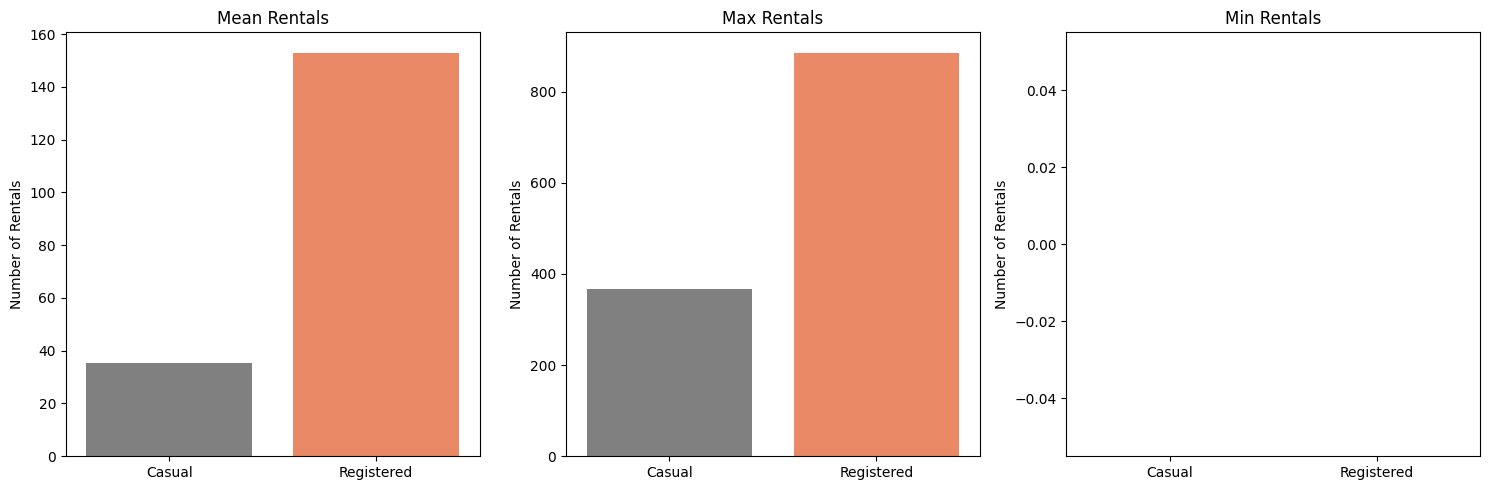

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['Mean Rentals', 'Max Rentals', 'Min Rentals']
values_casual = [hourly_rentals['Casual_Mean'].mean(),
                 hourly_rentals['Casual_Max'].max(),
                 hourly_rentals['Casual_Min'].min()]

values_registered = [hourly_rentals['Registered_Mean'].mean(),
                     hourly_rentals['Registered_Max'].max(),
                     hourly_rentals['Registered_Min'].min()]

# Menentukan kategori dengan nilai tertinggi
max_categories = ['Casual' if values_casual[i] > values_registered[i] else 'Registered' for i in range(3)]

# Warna untuk kategori tertinggi
colors = [['coral' if cat == max_categories[i] else 'gray' for cat in ['Casual', 'Registered']] for i in range(3)]

# Visualisasi Mean, Max, Min
for i in range(3):
    sns.barplot(x=['Casual', 'Registered'], y=[values_casual[i], values_registered[i]],
                ax=ax[i], palette=colors[i])
    ax[i].set_title(metrics[i])
    ax[i].set_ylabel('Number of Rentals')

plt.tight_layout()
plt.show()

**Insight:**

- Analisis ini bertujuan untuk memahami perbedaan pola penggunaan sepeda antara pengguna casual dan registered, sehingga dapat membantu dalam pengelolaan stok sepeda, strategi promosi, serta penyesuaian kebijakan harga untuk meningkatkan keterlibatan pengguna.

- Pengguna Registered lebih dominan dalam peminjaman sepeda sepanjang hari, dengan dua puncak utama:
  - Pagi (07:00 - 09:00): Mencerminkan penggunaan sepeda untuk perjalanan ke kantor atau sekolah.
  - Sore (17:00 - 19:00): Menunjukkan perjalanan pulang dari aktivitas harian.

- Pengguna Casual memiliki tren peminjaman yang lebih fleksibel, dengan puncak tertinggi pada siang hingga sore hari (12:00 - 18:00), menunjukkan bahwa sepeda lebih sering digunakan untuk rekreasi atau aktivitas santai.

- Jumlah peminjaman sepeda di malam hingga dini hari (00:00 - 05:00) sangat rendah, baik untuk casual maupun registered users. Hal ini bisa disebabkan oleh keterbatasan visibilitas, keamanan, dan preferensi pengguna yang lebih memilih moda transportasi lain pada waktu tersebut.

## Analisis Lanjutan

### Analisis Pola Peminjaman Sepeda Berdasarkan Kombinasi Cuaca (Weathersit), Kecepatan Angin (Windspeed), Kelembaban (Humidity), Suhu (Temp), dan Suhu Terasa (Atemp)

#### Pengelompokan Data Berdasarkan Kategori Cuaca

In [36]:
def categorize_temp(temp):
    if temp < 0.3:
        return 'Low'
    elif temp < 0.6:
        return 'Medium'
    else:
        return 'High'

def categorize_atemp(atemp):
    if atemp < 0.3:
        return 'Low'
    elif atemp < 0.6:
        return 'Medium'
    else:
        return 'High'

def categorize_humidity(hum):
    if hum < 0.4:
        return 'Low'
    elif hum < 0.7:
        return 'Medium'
    else:
        return 'High'

def categorize_windspeed(wind):
    if wind < 0.25:
        return 'Low'
    elif wind < 0.40:
        return 'Medium'
    else:
        return 'High'

hour_df['temp_category'] = hour_df['temp'].apply(categorize_temp)
hour_df['atemp_category'] = hour_df['atemp'].apply(categorize_atemp)
hour_df['humidity_category'] = hour_df['hum'].apply(categorize_humidity)
hour_df['windspeed_category'] = hour_df['windspeed'].apply(categorize_windspeed)

#### Analisis Statistik Peminjaman Sepeda Berdasarkan Kombinasi Cuaca

In [37]:
weather_stats = hour_df.groupby(['weathersit', 'temp_category', 'atemp_category', 'humidity_category', 'windspeed_category'])['cnt'].agg(['mean', 'max', 'min', 'std'])
weather_stats = weather_stats.sort_values(by='mean', ascending=False)
weather_stats

mean  \
weathersit temp_category atemp_category humidity_category windspeed_category               
2          High          Low            Low               Medium              669.000000   
1          High          Medium         Low               Medium              605.666667   
                         Low            Low               Medium              574.000000   
2          High          Low            Low               High                488.000000   
                         High           Low               Medium              452.789474   
...                                                                                  ...   
3          Low           Low            Medium            Low                  28.928571   
           Medium        Medium         Low               Medium               22.600000   
                         Low            High              High                 20.230769   
1          Medium        Low            High              High                  7.000000   
2          High          Medium         Medium            Medium                6.000000   

                                                                              max  \
weathersit temp_category atemp_category humidity_category windspeed_category        
2          High          Low            Low               Medium              669   
1          High          Medium         Low               Medium              732   
                         Low            Low               Medium              791   
2          High          Low            Low               High                488   
                         High           Low               Medium              729   
...                                                                           ...   
3          Low           Low            Medium            Low                  78   
           Medium        Medium         Low               Medium               82   
                         Low            High              High                 53   
1          Medium        Low            High              High                  7   
2          High          Medium         Medium            Medium                6   

                                                                              min  \
weathersit temp_category atemp_category humidity_category windspeed_category        
2          High          Low            Low               Medium              669   
1          High          Medium         Low               Medium              376   
                         Low            Low               Medium              357   
2          High          Low            Low               High                488   
                         High           Low               Medium              145   
...                                                                           ...   
3          Low           Low            Medium            Low                   1   
           Medium        Medium         Low               Medium                1   
                         Low            High              High                  1   
1          Medium        Low            High              High                  7   
2          High          Medium         Medium            Medium                6   

                                                                                     std  
weathersit temp_category atemp_category humidity_category windspeed_category              
2          High          Low            Low               Medium                     NaN  
1          High          Medium         Low               Medium              199.229349  
                         Low            Low               Medium              306.884343  
2          High          Low            Low               High                       NaN  
                         High           Low               Medium              185.852564  
...                                   

**Insight:**

- Cuaca sedang dengan suhu tinggi dan kelembaban rendah mendorong peminjaman tertinggi
  - Kondisi dengan cuaca kategori 2 (mendung), suhu tinggi, kelembaban rendah, dan kecepatan angin sedang memiliki jumlah peminjaman rata-rata tertinggi, yaitu 669 sepeda per jam. Ini menunjukkan bahwa pengguna cenderung lebih nyaman bersepeda saat suhu hangat dan udara tidak terlalu lembap.

- Cuaca cerah juga menarik banyak peminjam
  - Pada cuaca kategori 1 (cerah) dengan suhu tinggi, kelembaban rendah, dan angin sedang, jumlah peminjaman rata-rata mencapai 605 sepeda per jam, dengan maksimum 732 sepeda dalam satu jam. Hal ini mengindikasikan bahwa kondisi cuaca yang ideal untuk aktivitas luar ruangan meningkatkan permintaan sepeda.

- Cuaca mendung dengan suhu tinggi dan kelembaban rendah tetap menarik bagi pengguna
  - Pada cuaca kategori 2 (mendung) dengan kondisi serupa, jumlah peminjaman rata-rata masih cukup tinggi, yaitu 574 sepeda per jam. Ini menunjukkan bahwa mendung tidak selalu mengurangi minat pengguna selama suhu masih nyaman.

- Kondisi cuaca buruk dan suhu rendah mengurangi peminjaman secara drastis
  - Pada cuaca kategori 3 (hujan/salju ringan) dengan suhu rendah, kelembaban sedang, dan kecepatan angin rendah, jumlah peminjaman hanya sekitar 28 sepeda per jam. Peminjaman terendah ditemukan pada kombinasi cuaca cerah (kategori 1), suhu sedang, kelembaban tinggi, dan angin kencang, dengan hanya 7 sepeda per jam.

#### Visualisasi Pola Peminjaman Sepeda Berdasarkan Faktor Cuaca

#### Pengaruh Suhu terhadap Peminjaman Sepeda

<ipython-input-38-56adb1f91cf8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_df['temp_category'], y=hour_df['cnt'], palette="Oranges")


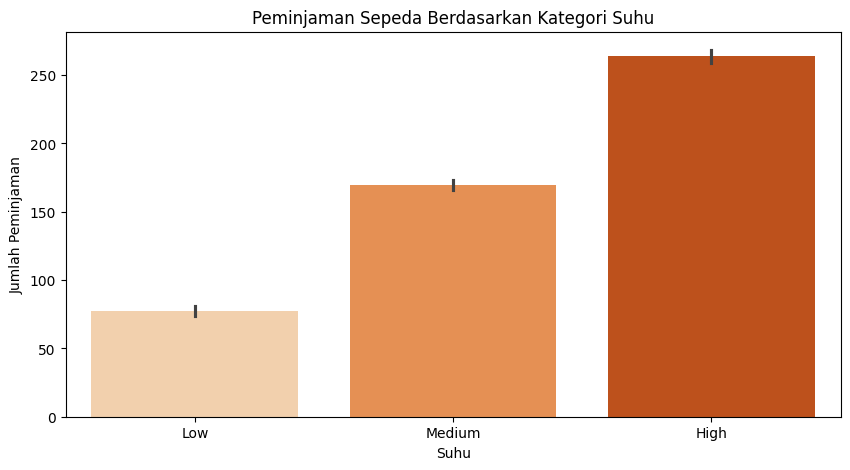

In [38]:
plt.figure(figsize=(10, 5))
sns.barplot(x=hour_df['temp_category'], y=hour_df['cnt'], palette="Oranges")
plt.title("Peminjaman Sepeda Berdasarkan Kategori Suhu")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**

- Peminjaman sepeda meningkat seiring kenaikan suhu
  - Pada suhu Low, jumlah peminjaman sepeda lebih rendah dibanding kategori lainnya.
  - Peminjaman meningkat signifikan pada suhu Medium, dan mencapai puncaknya pada suhu High.
  - Hal ini menunjukkan bahwa suhu yang lebih hangat cenderung menarik lebih banyak pengguna sepeda.

- Suhu rendah membatasi aktivitas bersepeda
  - Pengguna cenderung lebih sedikit meminjam sepeda saat suhu berada dalam kategori Low. Kemungkinan karena suhu dingin membuat perjalanan kurang nyaman bagi sebagian besar pengguna.

- Suhu tinggi menarik lebih banyak peminjam
  - Pada suhu High, jumlah peminjaman sepeda berada pada level tertinggi. Ini menunjukkan bahwa cuaca hangat lebih disukai untuk aktivitas luar ruangan seperti bersepeda

#### Pengaruh Kelembaban terhadap Peminjaman Sepeda

<ipython-input-39-45f41ac81191>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hour_df['humidity_category'], y=hour_df['cnt'], palette="Oranges")


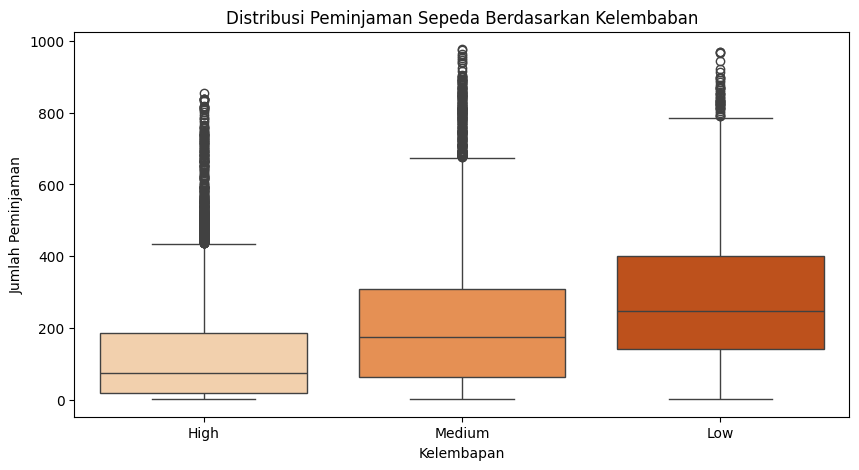

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=hour_df['humidity_category'], y=hour_df['cnt'], palette="Oranges")
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Kelembaban")
plt.xlabel("Kelembapan")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**

- Kelembaban rendah (Low) berhubungan dengan peminjaman sepeda yang lebih tinggi
  - Median peminjaman sepeda dalam kategori Low humidity lebih tinggi dibanding kategori lainnya. Hal ini menunjukkan bahwa kondisi udara yang lebih kering lebih disukai oleh pengguna sepeda.

- Kelembaban tinggi (High) cenderung mengurangi peminjaman sepeda
  - Pada kelembapan tinggi, jumlah peminjaman lebih rendah dan tersebar di kisaran yang lebih kecil. Mungkin karena udara yang terlalu lembap membuat perjalanan terasa kurang nyaman atau lebih melelahkan.

- Sebaran data menunjukkan adanya beberapa outlier
  - Terdapat beberapa titik peminjaman yang sangat tinggi di setiap kategori kelembapan. Ini bisa mengindikasikan adanya hari-hari tertentu dengan permintaan sepeda yang sangat tinggi, misalnya saat ada event atau faktor lain.

#### Pengaruh Kecepatan Angin terhadap Peminjaman Sepeda

<ipython-input-40-ad1ce4a5c762>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_df['windspeed_category'], y=hour_df['cnt'], palette="Oranges")


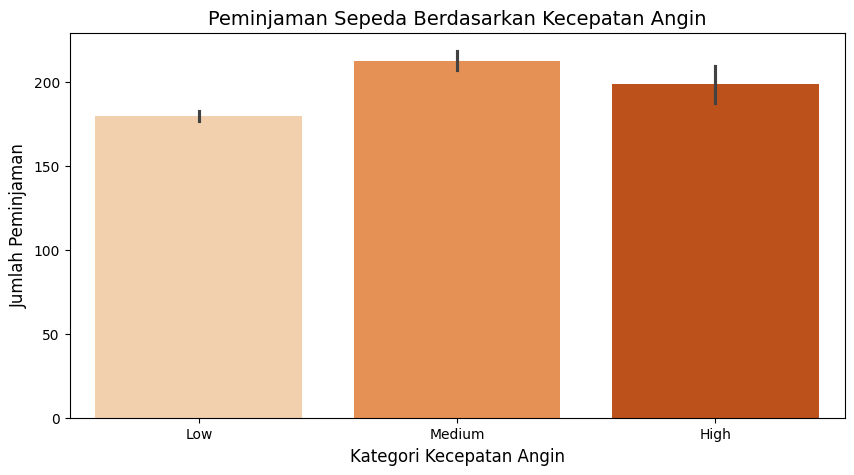

In [40]:
plt.figure(figsize=(10, 5))
sns.barplot(x=hour_df['windspeed_category'], y=hour_df['cnt'], palette="Oranges")
plt.title("Peminjaman Sepeda Berdasarkan Kecepatan Angin", fontsize=14)
plt.xlabel("Kategori Kecepatan Angin", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)
plt.show()

**Insight:**

- Kecepatan angin rendah (Low) berhubungan dengan jumlah peminjaman tertinggi
  - Rata-rata jumlah peminjaman sepeda lebih tinggi saat angin berhembus dengan kecepatan rendah. Ini menunjukkan bahwa kondisi angin yang tenang lebih disukai oleh pengguna sepeda.

- Kecepatan angin tinggi (High) berpengaruh negatif terhadap peminjaman sepeda
  - Semakin tinggi kecepatan angin, jumlah peminjaman sepeda cenderung menurun. Hal ini mungkin disebabkan oleh faktor kenyamanan dan keamanan saat bersepeda dalam kondisi angin kencang.

- Perbedaan signifikan antara kategori kecepatan angin
  - Terdapat selisih cukup besar antara jumlah peminjaman pada kecepatan angin rendah dan tinggi. Ini bisa menjadi faktor penting dalam perencanaan operasional penyewaan sepeda, misalnya dengan memberikan insentif pada hari berangin untuk meningkatkan peminjaman.

####  Kombinasi Semua Faktor Cuaca

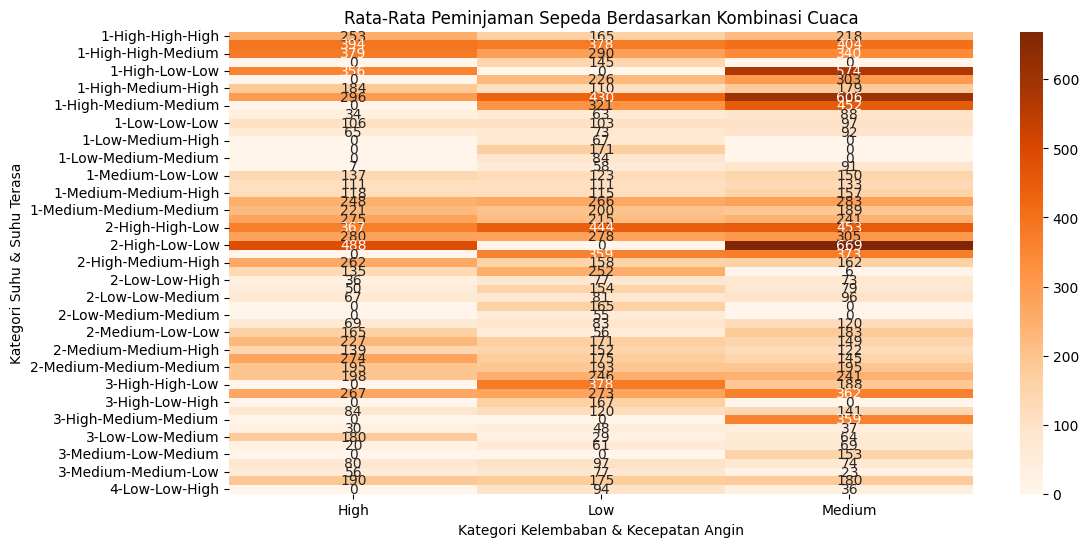

In [41]:
plt.figure(figsize=(12, 6))
sns.heatmap(weather_stats['mean'].unstack().fillna(0), cmap="Oranges", annot=True, fmt=".0f")
plt.title("Rata-Rata Peminjaman Sepeda Berdasarkan Kombinasi Cuaca")
plt.xlabel("Kategori Kelembaban & Kecepatan Angin")
plt.ylabel("Kategori Suhu & Suhu Terasa")
plt.show()

**Insight:**

- Suhu tinggi dengan kelembaban rendah dan angin rendah memiliki jumlah peminjaman tertinggi. Ini menunjukkan bahwa cuaca yang hangat dan kering lebih disukai oleh pengguna sepeda.

- Suhu tinggi dengan kelembaban tinggi dan angin tinggi masih memiliki tingkat peminjaman cukup tinggi, meskipun sedikit menurun dibandingkan dengan kelembaban rendah.

- Saat suhu rendah dengan kelembaban tinggi, peminjaman sepeda turun drastis, terutama jika kecepatan angin juga tinggi. Ini bisa disebabkan oleh kenyamanan bersepeda yang berkurang saat cuaca dingin dan lembab.

- Kecepatan angin tinggi umumnya mengurangi jumlah peminjaman, terutama saat suhu rendah dan kelembaban tinggi.

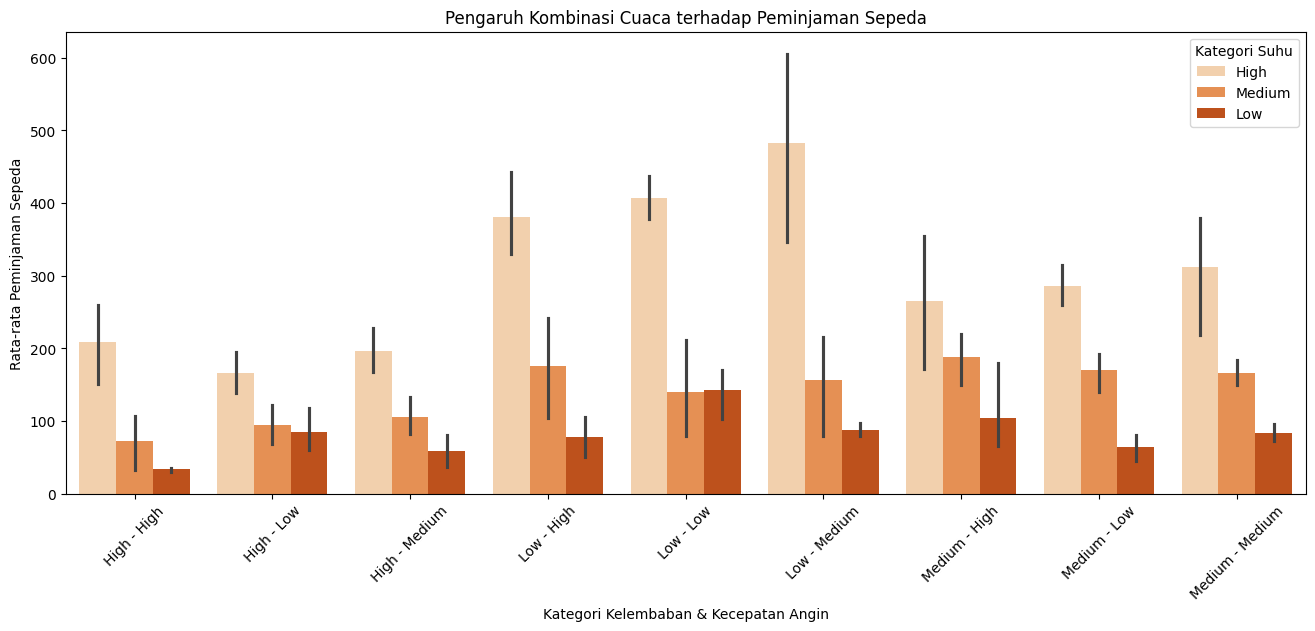

In [42]:
# Reset index agar lebih mudah diproses
weather_stats = weather_stats.reset_index()

# Gabungkan kategori kelembaban & kecepatan angin menjadi satu untuk sumbu X
weather_stats["Humidity_Wind"] = (
    weather_stats["humidity_category"] + " - " + weather_stats["windspeed_category"]
)

# Urutkan kategori agar sesuai dengan heatmap
order = sorted(weather_stats["Humidity_Wind"].unique())

# Plot grouped barplot
plt.figure(figsize=(16, 6))
sns.barplot(
    data=weather_stats,
    x="Humidity_Wind",
    y="mean",
    hue="temp_category",
    palette="Oranges",
    order=order
)

# Labeling
plt.title("Pengaruh Kombinasi Cuaca terhadap Peminjaman Sepeda")
plt.xlabel("Kategori Kelembaban & Kecepatan Angin")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.legend(title="Kategori Suhu")

# Rotasi label X agar lebih rapi
plt.xticks(rotation=45)

# Tampilkan plot
plt.show()


**Insight:**

- Jumlah peminjaman sepeda lebih tinggi ketika suhu terasa lebih tinggi hingga sedang dan kelembaban serta kecepatan angin berada di tingkat rendah hingga sedang. Cuaca yang panas dengan kelembaban rendah tampaknya menjadi kondisi ideal bagi pengguna sepeda.
- Suhu tinggi (High) cenderung memiliki jumlah peminjaman lebih banyak, terutama ketika dikombinasikan dengan kecepatan angin rendah hingga sedang.
- Ketika suhu menurun ke kategori medium atau low, jumlah peminjaman juga terlihat menurun, terutama saat kelembaban tinggi. Kategori suhu rendah (Low) memiliki peminjaman paling sedikit, kemungkinan karena suhu dingin membuat pengguna enggan bersepeda.
- Kelembaban rendah & angin sedang → Menunjukkan jumlah peminjaman yang tinggi di beberapa kategori suhu tinggi.
- Kelembaban tinggi & angin tinggi → Menunjukkan jumlah peminjaman yang rendah, kemungkinan karena kondisi ini membuat bersepeda terasa lebih melelahkan dan tidak nyaman.
- Kombinasi kelembaban sedang dan angin rendah → Masih memiliki jumlah peminjaman yang lumayan, tetapi tidak sebaik kondisi dengan kelembaban rendah.
- Peminjaman tertinggi terjadi pada kombinasi:
  - Suhu tinggi - Kelembaban rendah - Kecepatan angin sedang.
  - Suhu tinggi - Kelembaban rendah - Kecepatan angin rendah.
- Peminjaman terendah terjadi pada kombinasi:
  - Suhu rendah - Kelembaban tinggi - Kecepatan angin tinggi.
- Orang lebih suka bersepeda ketika suhu tinggi hingga sedang, kelembaban rendah, dan angin tidak terlalu kencang. Kelembaban dan kecepatan angin yang tinggi cenderung menurunkan jumlah peminjaman, mungkin karena membuat kondisi kurang nyaman.

### Total Peminjaman Sepeda Berdasarkan Musim

<ipython-input-44-6c69baea6608>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_avg, x="season_desc", y="cnt", palette=colors)


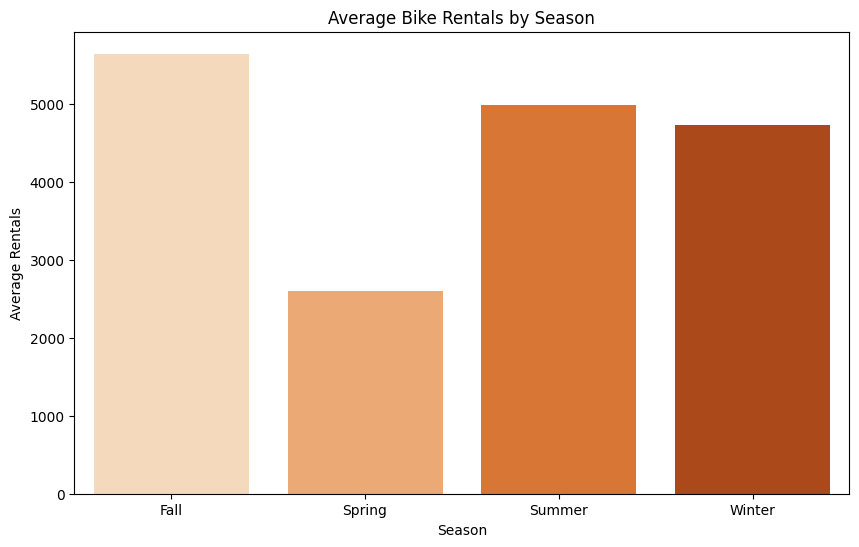

In [44]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Oranges", len(season_avg))

# Buat bar plot
sns.barplot(data=season_avg, x="season_desc", y="cnt", palette=colors)

# Tambahkan label
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.title("Average Bike Rentals by Season")

# Tampilkan plot
plt.show()

## Conclusion

**1. Apakah ada pola lonjakan peminjaman sepeda pada tanggal tertentu dalam sebulan?**

Hasil analisis menunjukkan bahwa terdapat lonjakan peminjaman sepeda pada tanggal tertentu dalam sebulan.

Tanggal dengan Peminjaman Sepeda Tertinggi:

- Tanggal 15 mencatat peminjaman tertinggi dengan rata-rata 4.819,88 dan puncaknya mencapai 8.714 unit. Pola ini dapat dikaitkan dengan pertengahan bulan, di mana aktivitas masyarakat masih tinggi sebelum mendekati akhir bulan. Kemungkinan besar ada hubungan dengan jadwal gajian atau meningkatnya aktivitas sosial di akhir pekan.
- Tanggal 20 juga menunjukkan angka rata-rata peminjaman yang tinggi (4.779,04), yang menandakan peningkatan penggunaan sepeda menjelang akhir bulan. Banyak pengguna mungkin mulai lebih sering bersepeda untuk keperluan transportasi atau aktivitas rekreasi.

Pola Peminjaman Berdasarkan Awal, Tengah, dan Akhir Bulan:

- Awal bulan (1-10): Stabil dengan rata-rata 4.300 - 4.600 unit per hari. Tanggal 2, 3, dan 5 menunjukkan tren peminjaman lebih tinggi dibandingkan tanggal lainnya di awal bulan.
- Pertengahan bulan (11-20): Memiliki lonjakan peminjaman tertinggi, dengan puncaknya pada tanggal 15 dan 20. Tanggal 17 juga menunjukkan peningkatan signifikan dengan rata-rata 4.927 unit. Lonjakan ini bisa mencerminkan periode aktivitas kerja dan sosial yang lebih tinggi dibandingkan dengan waktu lainnya dalam bulan tersebut.
- Akhir bulan (21-31): Tren peminjaman sedikit menurun dibanding pertengahan bulan, tetapi masih ada lonjakan pada tanggal 22 dan 29, dengan tanggal 29 mencapai 8.555 peminjaman pada puncaknya.

**2. Bagaimana perbedaan perilaku peminjaman sepeda antara pengguna casual dan registered dalam 24 jam?**

Hasil analisis menunjukkan bahwa terdapat perbedaan yang cukup mencolok dalam pola peminjaman sepeda antara pengguna casual (pengguna tidak terdaftar) dan registered (pengguna terdaftar) dalam satu hari.

Pengguna registered cenderung meminjam sepeda lebih banyak pada jam sibuk, terutama pada pagi hari saat berangkat kerja (sekitar pukul 07:00 - 09:00) dan sore hari saat pulang kerja (16:00 - 19:00). Hal ini mengindikasikan bahwa mereka lebih sering menggunakan sepeda sebagai alat transportasi utama dibandingkan untuk sekadar rekreasi.

Pengguna casual lebih banyak meminjam sepeda pada akhir pekan dan di luar jam sibuk, terutama pada siang dan sore hari, yang menunjukkan bahwa mereka lebih cenderung menggunakan sepeda untuk rekreasi atau keperluan non-komuter.

Pola ini menunjukkan bahwa layanan penyewaan sepeda dapat mengoptimalkan jumlah unit sepeda yang tersedia dengan mempertimbangkan waktu puncak untuk pengguna registered dan meningkatkan promosi atau fasilitas tambahan bagi pengguna casual di luar jam sibuk agar meningkatkan penggunaan sepeda di waktu-waktu tertentu.